In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendra
import os

In [114]:
df=pd.read_csv("My Uber Drives - 2016.csv")

In [115]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [116]:
df.shape

(1156, 7)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [118]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [119]:
df[df['END_DATE*'].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [120]:
df.drop(df[df['END_DATE*'].isna()].index,axis=0, inplace=True)

In [121]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [123]:
df.drop(['PURPOSE*'],axis=1,inplace=True)

In [124]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7
...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4


In [125]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


In [126]:
df.drop(df[df['END_DATE*'].duplicated()].index,axis=0,inplace=True)

In [127]:
df.duplicated().sum()

0

In [128]:
# Converting 'START DATE*' column to datetime
df["START_DATE*"]=pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')

# Converting 'END_DATE*' column to date time
df["END_DATE*"]=pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')

#Pirnting the data types after conversion
print(df.dtypes)

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
dtype: object


In [129]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


In [130]:
# Exploratory data analysis(EDA)

#univariate

df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

In [131]:
df[['CATEGORY*', 'MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*', 'sum'))

,tot_miles
CATEGORY*,
Business,11477.1
Personal,717.7


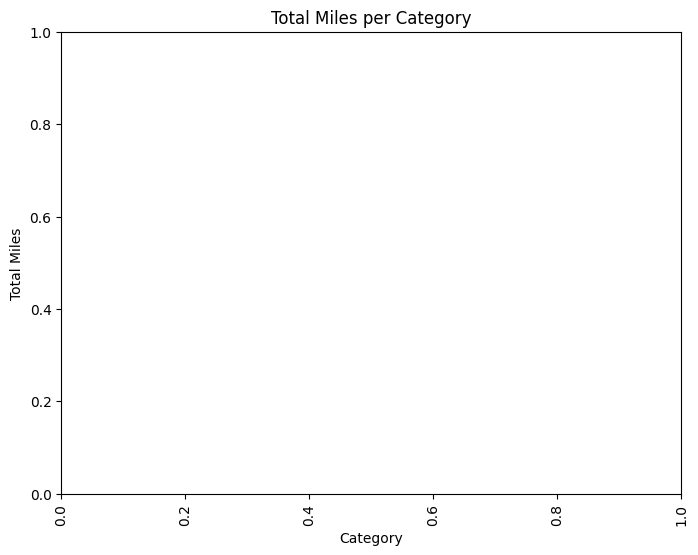

In [147]:
import matplotlib.pyplot as plt

plt.figure()

df[['CATEGORY*', 'MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*', 'sum'))

plt.title('Total Miles per Category')
plt.ylabel('Total Miles')
plt.xlabel('Category')
plt.xticks(rotation=90)

fig=plt.gcf()
fig.set_size_inches(640/80, 480/80)


plt.show()

In [133]:
len(df['START*'].unique())

177

In [134]:
df['START*'].value_counts(ascending=False)[:10]

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

<Axes: ylabel='Count'>

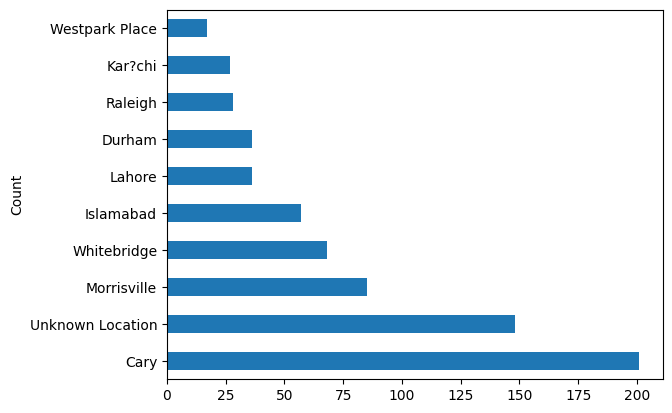

In [135]:
df['START*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Count')

In [136]:
len(df['STOP*'].unique())

188

In [137]:
df['STOP*'].value_counts(ascending=False)[:10]

STOP*
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64

<Axes: ylabel='Count'>

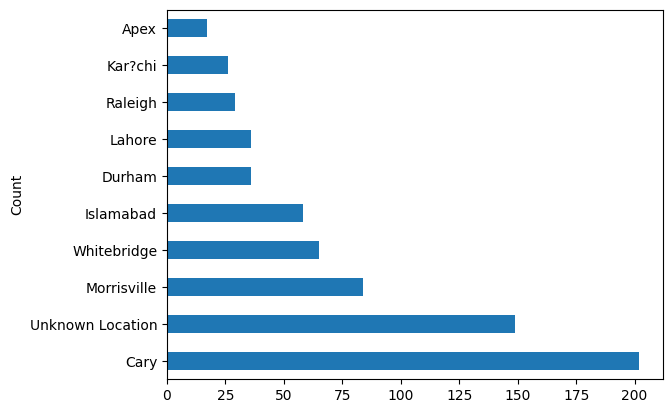

In [138]:
df['STOP*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Count')

In [139]:
df[df['START*']=='Unknown Location']['START*'].value_counts()

START*
Unknown Location    148
Name: count, dtype: int64

In [140]:
df[df['STOP*']=='Unknown Location']['STOP*'].value_counts()

STOP*
Unknown Location    149
Name: count, dtype: int64

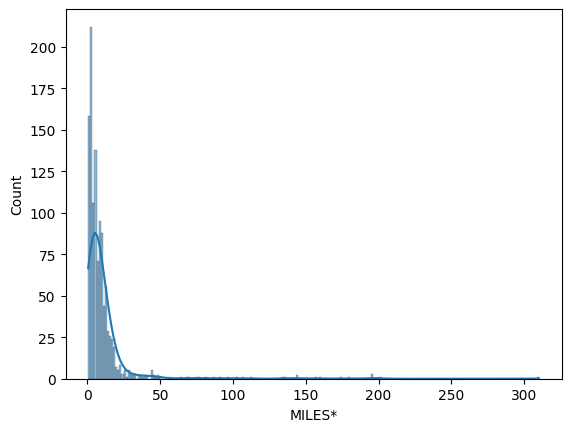

In [141]:
sns.histplot(df['MILES*'], kde=True);

In [142]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
START_DATE*,1154,2016-07-17 00:07:01.611784960,2016-01-01 21:11:00,2016-03-31 20:23:30,2016-07-21 17:29:30,2016-10-27 21:16:15,2016-12-31 22:08:00,NaN
END_DATE*,1154,2016-07-17 00:30:16.117850880,2016-01-01 21:17:00,2016-03-31 20:52:00,2016-07-21 17:37:00,2016-10-27 21:34:30,2016-12-31 23:51:00,NaN
MILES*,1154.0,10.567418,0.5,2.9,6.0,10.4,310.3,21.588452


In [143]:
df.groupby(['START*', 'STOP*'])['MILES*'].sum().sort_values(ascending=False)[1:]

START*          STOP*        
Morrisville     Cary             395.7
Cary            Durham           390.0
                Morrisville      380.0
Raleigh         Cary             365.7
Cary            Raleigh          336.5
                                 ...  
Medical Centre  Tudor City         0.7
Sunnyside       Ingleside          0.7
Central         West Berkeley      0.6
Katunayaka      Katunayaka         0.5
Soho            Tribeca            0.5
Name: MILES*, Length: 362, dtype: float64

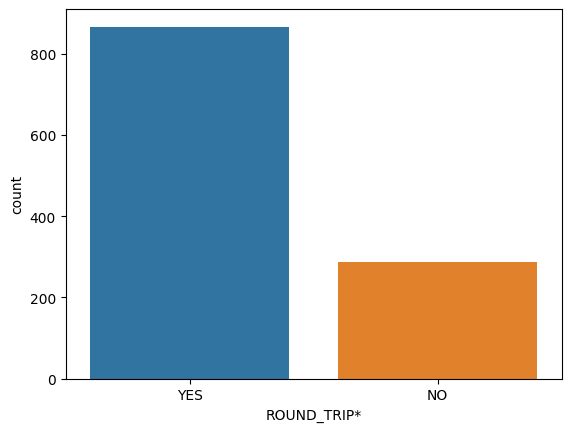

In [145]:
def is_roundtrip(df):
    if df['START*'] != df['STOP*']:
        return 'YES'
    else:
        return 'NO'

df['ROUND_TRIP*']=df.apply(is_roundtrip, axis=1)

sns.countplot(x='ROUND_TRIP*',data=df,order=df['ROUND_TRIP*'].value_counts().index)

plt.show();